In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, kpss
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Google%20Stock%20Data/GOOGL.csv")

In [3]:
df.shape

(4431, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [5]:
df['Date'] =  pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df = df.set_index('Date')
df.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=4431, freq=None)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4431 entries, 2004-08-19 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4431 non-null   float64
 1   High       4431 non-null   float64
 2   Low        4431 non-null   float64
 3   Close      4431 non-null   float64
 4   Adj Close  4431 non-null   float64
 5   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 242.3 KB


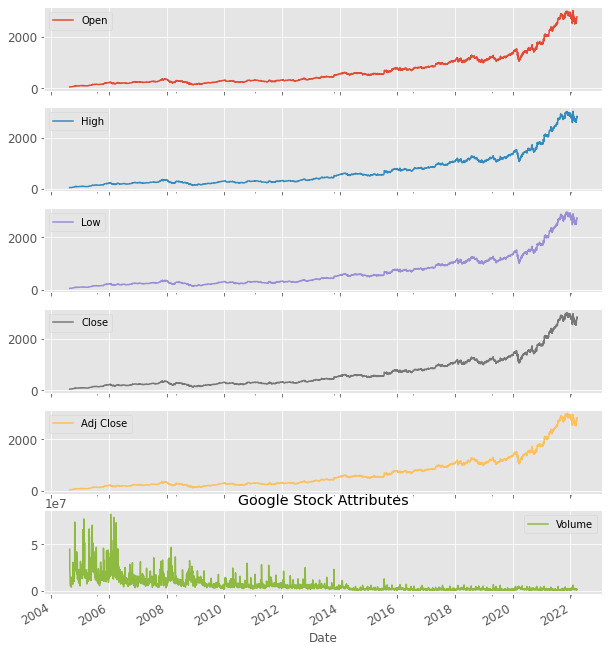

In [9]:
df.plot(subplots = True, figsize = (10,12))
plt.title('Google Stock Attributes')
plt.show()

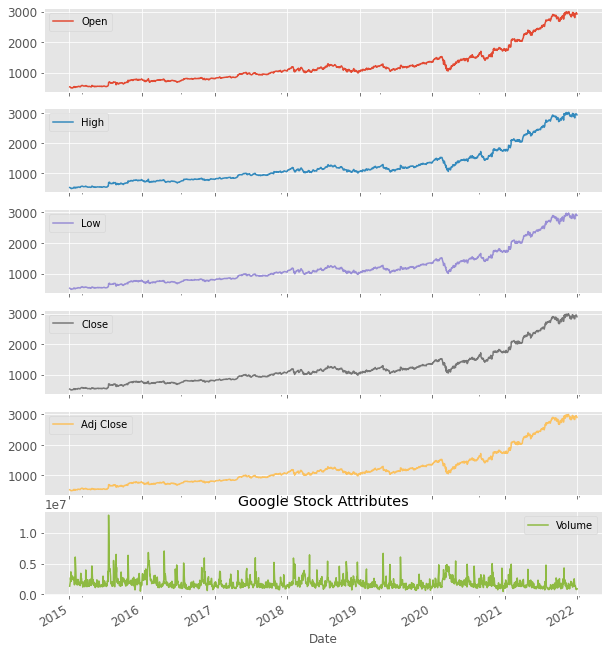

In [10]:
df['2015':'2021'].plot(subplots = True, figsize = (10,12))
plt.title('Google Stock Attributes')
plt.show()

<AxesSubplot:xlabel='Date'>

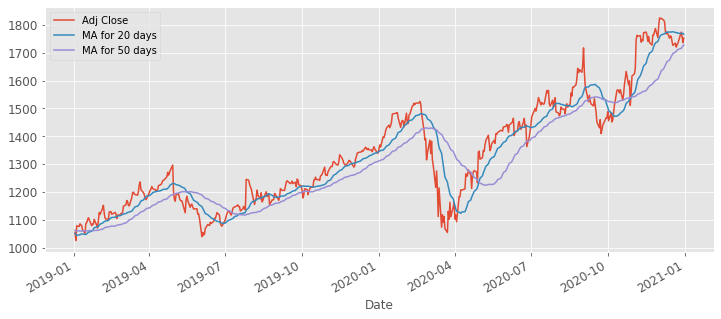

In [11]:
df['MA for 20 days'] = df['Open'].rolling(20).mean()
df['MA for 50 days'] = df['Open'].rolling(50).mean()
df.truncate(before = '2019-01-01', after = '2021-01-01')[['Adj Close','MA for 20 days','MA for 50 days']].plot(subplots = False, figsize = (12,5))

In [12]:
df['Daily Return'] = df['Adj Close'].pct_change()
result = df.sort_values(by = ['Daily Return'], ascending = False)
result.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,
2008-04-18,267.872864,274.124115,262.647644,269.974976,269.974976,36434729,230.548548,234.379380,0.199915
2015-07-17,680.000000,703.000000,678.000000,699.619995,699.619995,12858100,563.166998,554.126597,0.162584
2004-10-22,85.355354,90.175179,82.122124,86.301300,86.301300,73710016,69.287537,NaN,0.154304
2008-10-13,178.073074,191.166168,173.048050,190.700699,190.700699,17793189,201.635635,222.247347,0.147651
2013-10-18,488.778778,508.238251,487.487488,506.211212,506.211212,23109667,441.295296,439.776376,0.137963


In [13]:
result.dropna(inplace = True)
result.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,
2008-04-18,267.872864,274.124115,262.647644,269.974976,269.974976,36434729,230.548548,234.379380,0.199915
2015-07-17,680.000000,703.000000,678.000000,699.619995,699.619995,12858100,563.166998,554.126597,0.162584
2008-10-13,178.073074,191.166168,173.048050,190.700699,190.700699,17793189,201.635635,222.247347,0.147651
2013-10-18,488.778778,508.238251,487.487488,506.211212,506.211212,23109667,441.295296,439.776376,0.137963
2011-07-15,299.049042,300.425415,294.374359,299.109100,299.109100,27436736,256.722472,259.935533,0.129845


In [14]:
x = df['Open'].resample("MS").mean()
x.head()

Date
2004-08-01    52.752196
2004-09-01    56.044616
2004-10-01    76.321559
2004-11-01    89.172029
2004-12-01    90.789198
Freq: MS, Name: Open, dtype: float64

In [15]:
x['2019':]

Date
2019-01-01    1078.022374
2019-02-01    1120.121589
2019-03-01    1182.332392
2019-04-01    1228.014294
2019-05-01    1155.845448
2019-06-01    1086.237988
2019-07-01    1150.386807
2019-08-01    1183.592729
2019-09-01    1218.657983
2019-10-01    1231.316953
2019-11-01    1301.278503
2019-12-01    1341.275722
2020-01-01    1433.227615
2020-02-01    1461.980000
2020-03-01    1181.661810
2020-04-01    1232.039516
2020-05-01    1377.365002
2020-06-01    1431.744540
2020-07-01    1510.126370
2020-08-01    1539.920468
2020-09-01    1518.840489
2020-10-01    1541.015459
2020-11-01    1740.270502
2020-12-01    1767.972734
2021-01-01    1795.263158
2021-02-01    2050.223697
2021-03-01    2049.466070
2021-04-01    2269.076649
2021-05-01    2308.950488
2021-06-01    2419.096802
2021-07-01    2566.975237
2021-08-01    2760.346824
2021-09-01    2831.831927
2021-10-01    2792.460019
2021-11-01    2944.850946
2021-12-01    2902.532726
2022-01-01    2725.372998
2022-02-01    2748.172106
2022-03

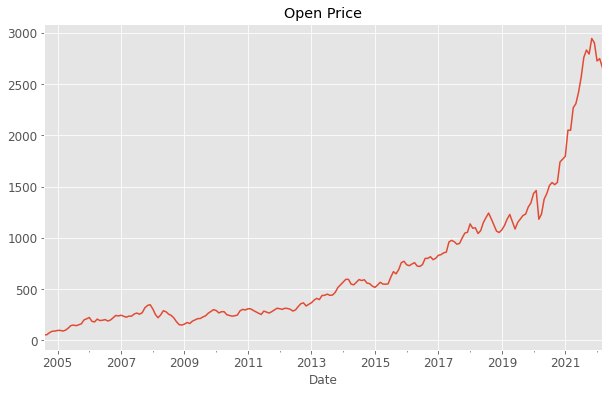

In [16]:
x.plot(figsize = (10,6))
plt.title("Open Price")
plt.show()

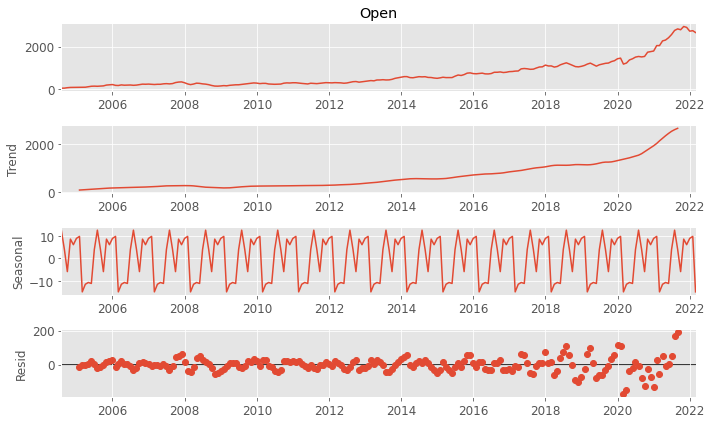

In [17]:
rcParams['figure.figsize'] = 10,6
decomposition = sm.tsa.seasonal_decompose(x, model = 'additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

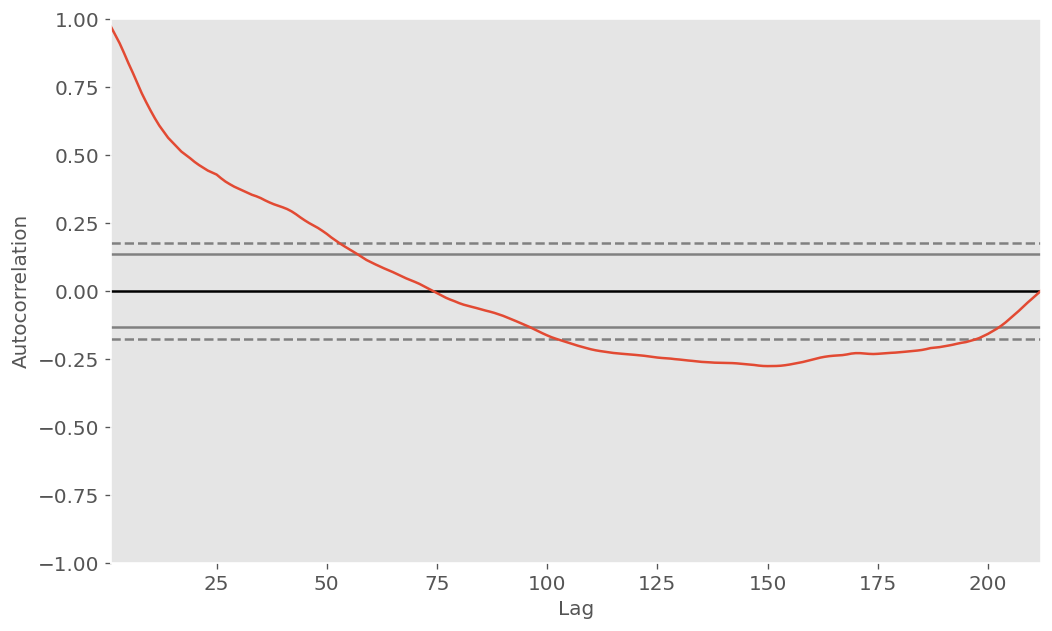

In [18]:
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(x.tolist())

In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(x, order = param, seasonal_order = param_seasonal, enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue
model = sm.tsa.statespace.SARIMAX(x, order = (1, 1, 1), seasonal_order = (1, 1, 0, 12), enforce_stationarity = False,
                                enforce_invertibility = False)
result = model.fit()
print(results.summary().tables[1])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3494.3423158994965
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3145.1028921505804
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2840.0225477667573
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2644.884408994397
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2676.827079219312
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2664.3699861820023
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2606.7366395564954
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2536.815725262929
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3200.646106201156
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2870.5638521903356
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2582.824693460996
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2407.271180030384
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2457.7988305743875
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2434.3828220005744
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2401.556586385067
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2322.9094782694133
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2260.781420273016
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2142.7264593434484


/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2112.6927105210125
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2135.551971978954
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2137.536386585791
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2044.8634145081126
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2030.5204718442726
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2239.710378858418
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2123.8427647180697
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2178.1449278307214


/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2061.8506987809064
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2132.8050677490846
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2124.729884797129
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2033.6811789440876
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2015.6782751951318
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2251.8277002242767
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2130.1868781207227
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2189.3132747839545
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2013.3316325244573
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2127.9090060497074
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2129.1093011631956
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2024.2280083345759
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2015.2931800185634
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2235.580380601783
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2120.0455400147157
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2170.063458614412
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2005.0433962158008
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2129.674012737

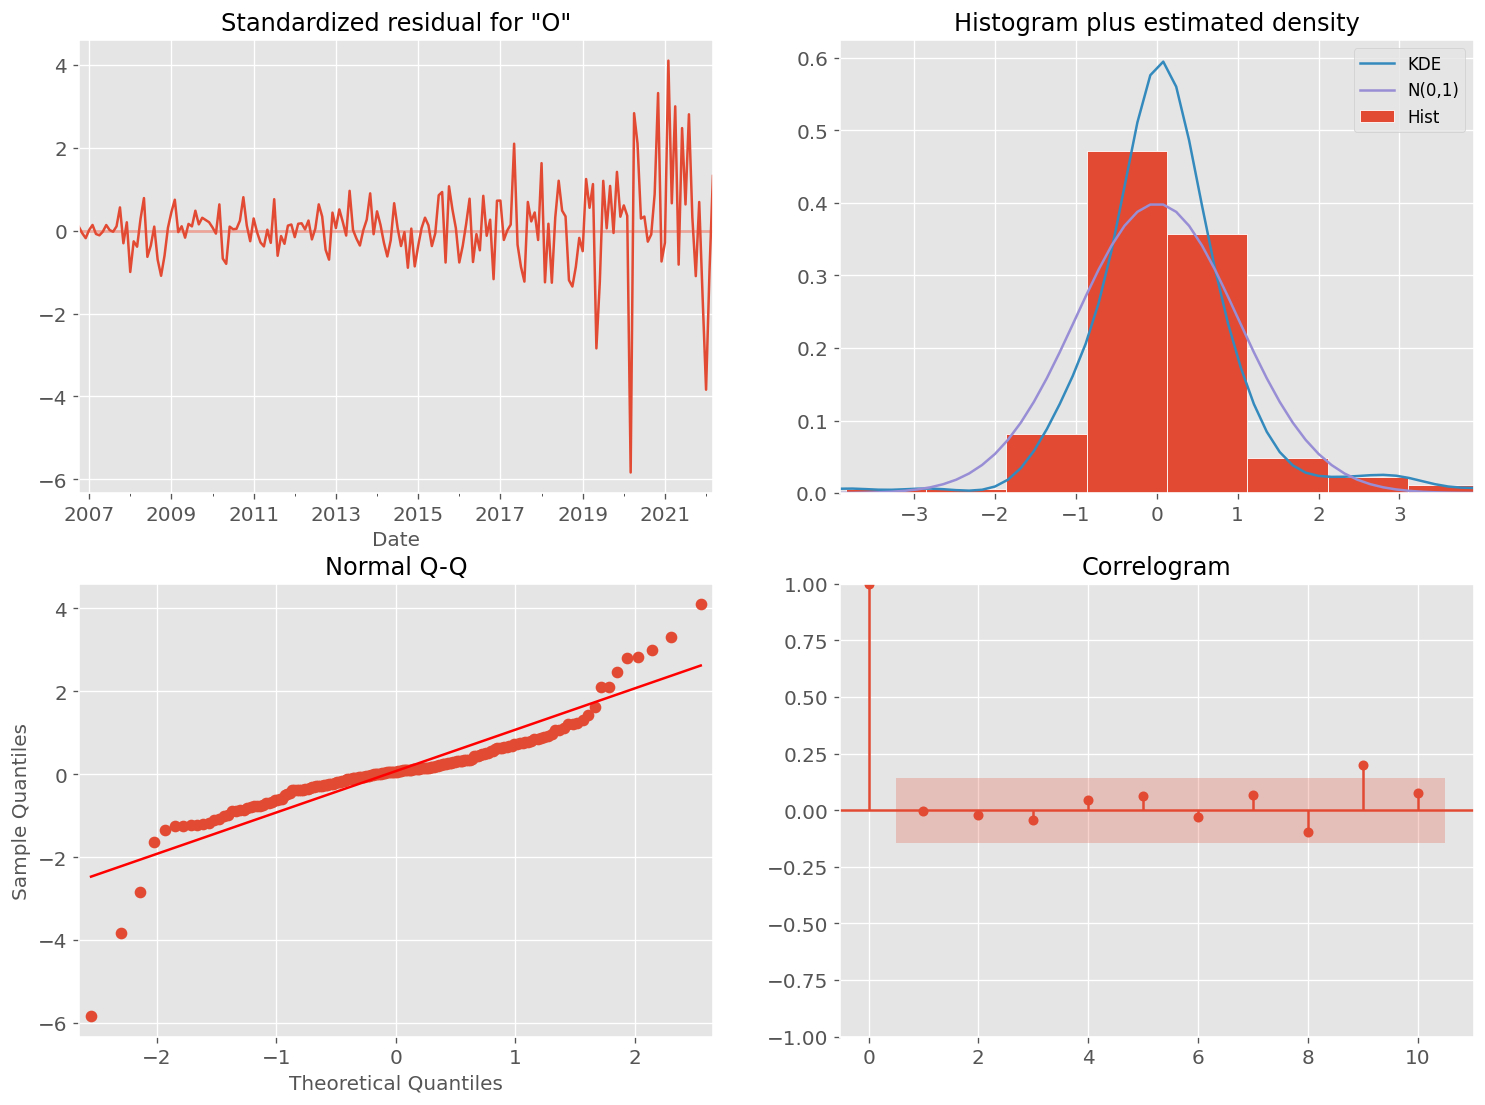

In [21]:
result.plot_diagnostics(figsize = (15, 11))
plt.show()

In [22]:
y_pred = result.get_prediction(start = pd.to_datetime('2019-01-01'), dynamic = False)
pred_ci = y_pred.conf_int()
print(pred_ci)

             lower Open   upper Open
Date                                
2019-01-01   998.113754  1212.102369
2019-02-01   945.274161  1159.262776
2019-03-01  1045.336416  1259.325030
2019-04-01  1059.822330  1273.810944
2019-05-01  1203.902565  1417.891180
2019-06-01  1046.640783  1260.629397
2019-07-01   977.940248  1191.928862
2019-08-01  1073.652051  1287.640665
2019-09-01  1052.883379  1266.871994
2019-10-01  1127.485044  1341.473659
2019-11-01  1117.028483  1331.017098
2019-12-01  1216.020929  1430.009543
2020-01-01  1293.089969  1507.078584
2020-02-01  1335.435598  1549.424213
2020-03-01  1393.079621  1607.068235
2020-04-01   970.535054  1184.523668
2020-05-01  1155.765917  1369.754532
2020-06-01  1308.969501  1522.958116
2020-07-01  1384.690227  1598.678842
2020-08-01  1447.527016  1661.515631
2020-09-01  1416.961974  1630.950589
2020-10-01  1386.101966  1600.090581
2020-11-01  1452.263598  1666.252213
2020-12-01  1701.658528  1915.647143
2021-01-01  1704.164803  1918.153418
2

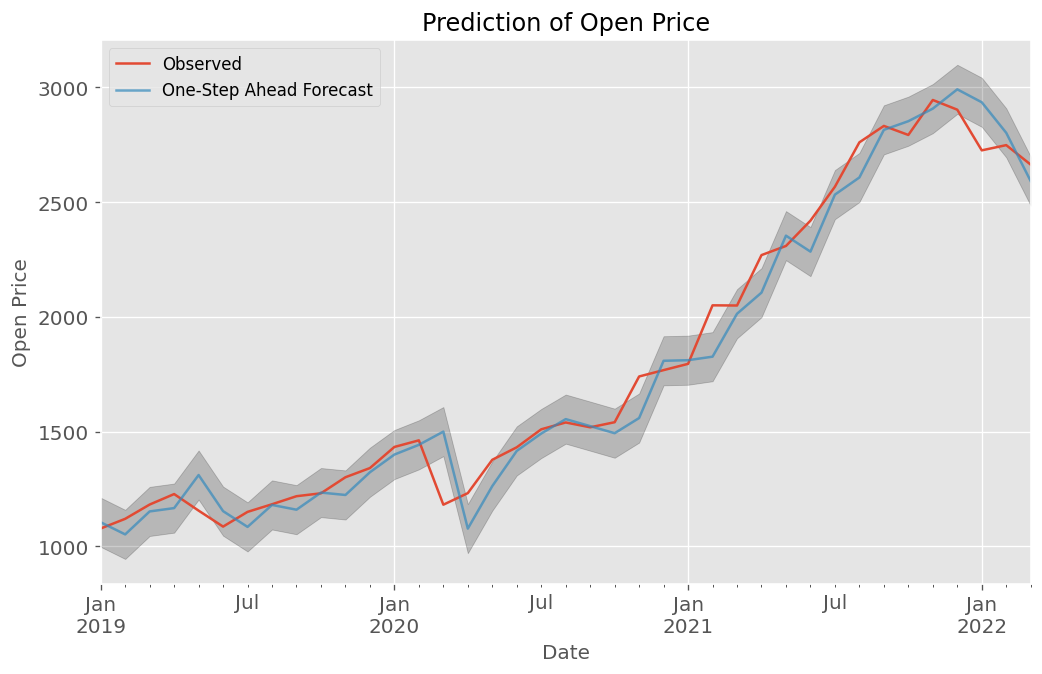

In [24]:
ax = x['2019':].plot(label = 'Observed')
y_pred.predicted_mean.plot(ax = ax, label = 'One-Step Ahead Forecast', alpha = .7, figsize = (10, 6))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
plt.title("Prediction of Open Price")
ax.set_xlabel('Date')
ax.set_ylabel('Open Price')
plt.legend()
plt.show()

In [25]:
y_forecasted = y_pred.predicted_mean
y_truth = x['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 10724.73
The Root Mean Squared Error of our forecasts is 103.56


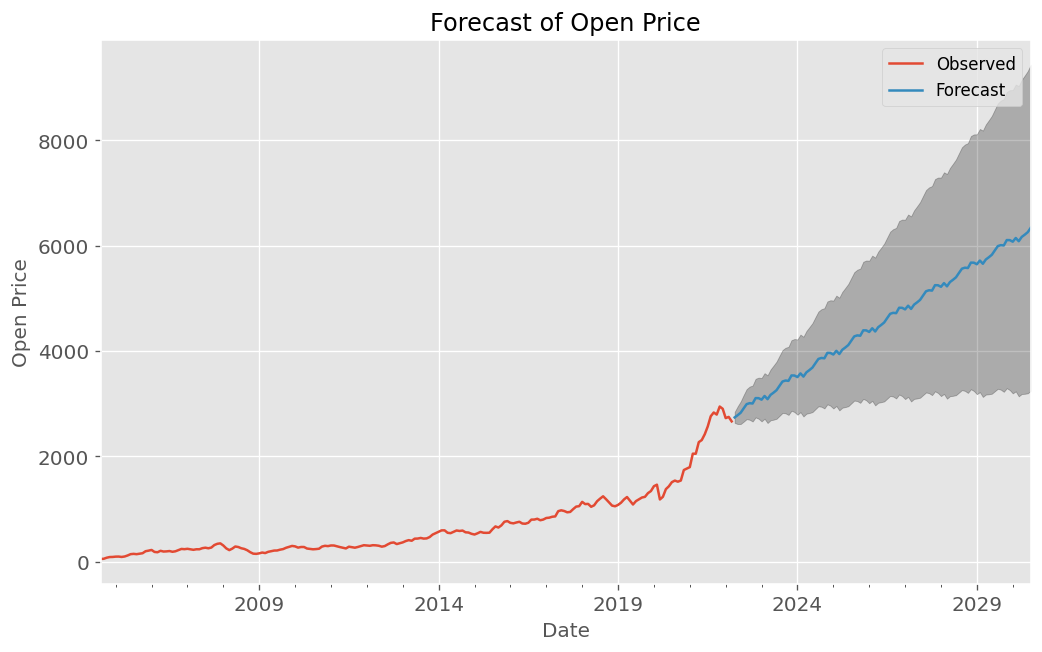

In [26]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = x.plot(label = 'Observed', figsize = (10,6))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .25)
plt.title("Forecast of Open Price")
ax.set_xlabel('Date')
ax.set_ylabel('Open Price')
plt.legend()
plt.show()

In [27]:
result = adfuller(x, autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

result = kpss(x, regression = 'c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 2.6709337835514564
p-value: 0.9990849305568777
Critial Values:
   1%, -3.4638151713286316
Critial Values:
   5%, -2.876250632135043
Critial Values:
   10%, -2.574611347821651

KPSS Statistic: 1.735154
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
